<a href="https://colab.research.google.com/github/O-suke12/Review/blob/master/ReviewWithPytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
from torch import nn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# **Linear Regression**

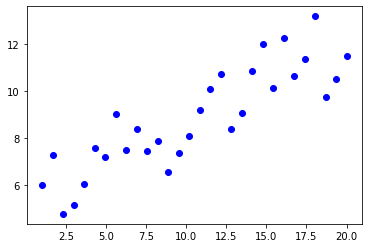

In [2]:
torch.manual_seed(0)
X_train = torch.linspace(1,20,30)
Y_train = (torch.linspace(4,10,30)+torch.rand(1,30)*4).reshape(30)
X_test = torch.linspace(1,20,10)
Y_test = (torch.linspace(4,10,10)+torch.rand(1,10)*4).reshape(10)
plt.plot(X_train, Y_train,'bo')

In [3]:
torch.manual_seed(0)
class linear_regression(nn.Module):
  def __init__(self) -> None:
    super().__init__()
    self.weight = nn.Parameter(torch.randn(1, 
                                           requires_grad=True, 
                                           dtype=torch.float))
    self.bias = nn.Parameter(torch.randn(1,
                                         requires_grad=True,
                                         dtype=torch.float))
    
  def forward(self, x:torch.Tensor)->torch.Tensor:
    return self.weight*x+self.bias

model0 = linear_regression()
model0
list(model0.parameters())

[Parameter containing:
 tensor([1.5410], requires_grad=True), Parameter containing:
 tensor([-0.2934], requires_grad=True)]

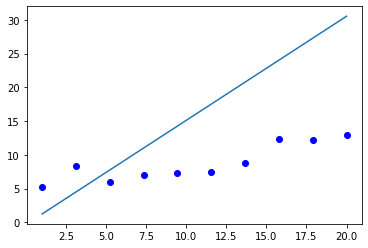

In [4]:
with torch.inference_mode():
  y_pred = model0(X_test)
y_pred
plt.plot(X_test, y_pred)
plt.plot(X_test, Y_test,'bo')

In [5]:
Loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(model0.parameters(),
                           lr=0.01)

epochs = 100
for epoch in range(epochs):
  model0.train()
  y_pred = model0(X_train)
  loss = Loss_fn(y_pred, Y_train)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  model0.eval()
  with torch.inference_mode():
    test_pred = model0(X_test)
    test_loss = Loss_fn(test_pred, Y_test)
  if epoch % 10 == 0:
    print(test_loss)

print(model0.state_dict())

tensor(7.7917)
tensor(2.2061)
tensor(2.1915)
tensor(2.1769)
tensor(2.1623)
tensor(2.1477)
tensor(2.1332)
tensor(2.1186)
tensor(2.1040)
tensor(2.0894)
OrderedDict([('weight', tensor([0.7427])), ('bias', tensor([-0.0081]))])


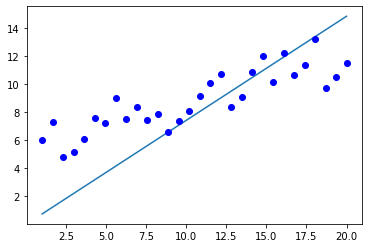

In [6]:
X = X_train = torch.linspace(1,20,30)
Y = model0.state_dict()["weight"]*X + model0.state_dict()["bias"]
plt.plot(X,Y)
plt.plot(X_train,Y_train, "bo")

# **Binary classification**

In [7]:
import sklearn
from sklearn.datasets import make_circles

n_samples = 1000
X,y = make_circles(n_samples,
                   noise = 0.03,
                   random_state=43)

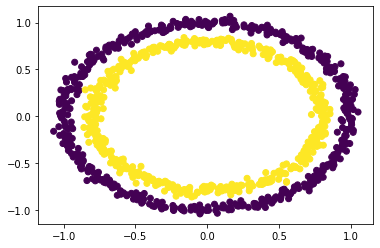

In [8]:
df = pd.DataFrame({"X1": X[:,0], "X2": X[:,1], "y": y})
plt.scatter(x=X[:,0], y=X[:,1], c=y)
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

In [10]:
class binary_calssification(nn.Module):
  def __init__(self):
    super().__init__()
    # self.layer1 = nn.Linear(in_feature=2, out_feature=5)
    # self.layer2 = nn.Linear(in_feature=5, out_feature=1)
    self.two_layer = nn.Sequential(
        nn.Linear(in_features=2, out_features=5),
        nn.Linear(in_features=5, out_features=1)
    )

  def forward(self,x):
    # return self.layer2(self.layer1(x))
    return self.two_layer(x)

model1 = binary_calssification()
Loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(params=model1.parameters(),
                            lr=0.1)
model1.state_dict

<bound method Module.state_dict of binary_calssification(
  (two_layer): Sequential(
    (0): Linear(in_features=2, out_features=5, bias=True)
    (1): Linear(in_features=5, out_features=1, bias=True)
  )
)>

In [11]:
print(model1(X[:5]))
print(torch.sigmoid(model1(X[:5])))
print(torch.round(torch.sigmoid(model1(X[:5]))).squeeze())
torch.eq(torch.round(torch.sigmoid(model1(X[:5]))).squeeze(), y[:5].squeeze())

tensor([[-0.0685],
        [-0.2417],
        [-0.0047],
        [-0.2499],
        [ 0.0009]], grad_fn=<AddmmBackward0>)
tensor([[0.4829],
        [0.4399],
        [0.4988],
        [0.4379],
        [0.5002]], grad_fn=<SigmoidBackward0>)
tensor([0., 0., 0., 0., 1.], grad_fn=<SqueezeBackward0>)


tensor([False, False,  True, False,  True])

In [12]:
def accuracy_fn(y_true, y_pred):
  correct = torch.eq(y_true, y_pred).sum().item()
  acc = (correct/len(y_pred))*100
  return acc

In [13]:
epochs = 100

for epoch in range(epochs):
  
  model1.train()
  y_logits = model1(X_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits))
  loss = Loss_fn(y_logits, y_train)
  #if you use just BCELOSS Loss_fn(sigmoid(y_logits), y_train)
  acc = accuracy_fn(y_train, y_pred)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()#gradient descnet
  
  model1.eval()
  with torch.inference_mode():
    test_logits = model1(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))
    test_loss = Loss_fn(test_logits, y_test)
    test_acc = accuracy_fn(y_test, test_pred)

  if epoch % 10 == 0:
    print(f"Epoch: {epoch} | Loss: {loss:.5f}, Accuracy: {acc:.2f}% | TestLoss: {test_loss:.5f}, Test Acc: {test_acc:.2f}%")

Epoch: 0 | Loss: 0.69625, Accuracy: 46.50% | TestLoss: 0.69646, Test Acc: 46.00%
Epoch: 10 | Loss: 0.69464, Accuracy: 48.50% | TestLoss: 0.69588, Test Acc: 48.50%
Epoch: 20 | Loss: 0.69399, Accuracy: 50.00% | TestLoss: 0.69575, Test Acc: 46.50%
Epoch: 30 | Loss: 0.69369, Accuracy: 50.62% | TestLoss: 0.69573, Test Acc: 47.00%
Epoch: 40 | Loss: 0.69354, Accuracy: 51.00% | TestLoss: 0.69570, Test Acc: 47.50%
Epoch: 50 | Loss: 0.69345, Accuracy: 51.00% | TestLoss: 0.69564, Test Acc: 48.50%
Epoch: 60 | Loss: 0.69338, Accuracy: 51.25% | TestLoss: 0.69557, Test Acc: 49.00%
Epoch: 70 | Loss: 0.69333, Accuracy: 51.62% | TestLoss: 0.69549, Test Acc: 48.00%
Epoch: 80 | Loss: 0.69329, Accuracy: 51.50% | TestLoss: 0.69541, Test Acc: 48.50%
Epoch: 90 | Loss: 0.69325, Accuracy: 51.62% | TestLoss: 0.69532, Test Acc: 50.00%


In [14]:
input = torch.tensor([[[1,2,3],
                     [1,2,3]]])
print(input)
print(input.size())
print(torch.squeeze(input))
print(torch.squeeze(input).size())

tensor([[[1, 2, 3],
         [1, 2, 3]]])
torch.Size([1, 2, 3])
tensor([[1, 2, 3],
        [1, 2, 3]])
torch.Size([2, 3])


In [15]:
import requests
from pathlib import Path
if Path("helper_function.py").is_file():
  print("already exist")
else:
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_function.py", "wb") as f:
    f.write(request.content)

from helper_function import plot_decision_boundary

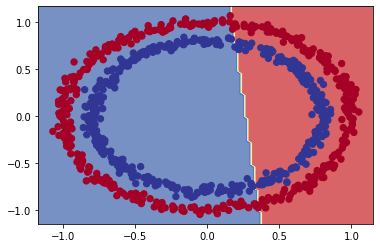

In [16]:
from helper_function import plot_decision_boundary
plot_decision_boundary(model1, X_train, y_train)

Improvement

In [17]:
class circle_model0(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer1 = nn.Linear(in_features = 2, out_features=10)
    self.layer2 = nn.Linear(in_features = 10, out_features=10)
    self.layer3 = nn.Linear(in_features = 10, out_features=1)
    self.relu = nn.ReLU()

  def forward(self,X):
    z = self.layer1(X)
    z = self.relu(z)
    z = self.layer2(z)
    z = self.relu(z)
    z = self.layer3(z)
    return z 

model2 = circle_model0()
Loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(params=model1.parameters(),
                            lr=0.1)

In [18]:
epochs = 1500
optimizer = torch.optim.SGD(model2.parameters(),
                            lr = 0.1)

for epoch in range(epochs):
  model2.train()
  y_logits = model2(X_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits))
  loss = Loss_fn(y_logits, y_train)
  acc = accuracy_fn( y_train, y_pred)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  model2.eval()
  with torch.inference_mode():
    test_logits = model2(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))
    test_loss = Loss_fn(test_logits, y_test)
    test_acc = accuracy_fn(y_test, test_pred)

  if epoch % 100 == 0:
    print(f"Epoch: {epoch} | Loss: {loss:.5f}, Accuracy: {acc:.2f}% | TestLoss: {test_loss:.5f}, Test Acc: {test_acc:.2f}%")

Epoch: 0 | Loss: 0.69464, Accuracy: 50.50% | TestLoss: 0.69723, Test Acc: 48.00%
Epoch: 100 | Loss: 0.68805, Accuracy: 58.50% | TestLoss: 0.68846, Test Acc: 60.00%
Epoch: 200 | Loss: 0.68498, Accuracy: 59.38% | TestLoss: 0.68565, Test Acc: 60.50%
Epoch: 300 | Loss: 0.68103, Accuracy: 58.00% | TestLoss: 0.68216, Test Acc: 59.50%
Epoch: 400 | Loss: 0.67542, Accuracy: 58.75% | TestLoss: 0.67705, Test Acc: 59.50%
Epoch: 500 | Loss: 0.66712, Accuracy: 59.75% | TestLoss: 0.66964, Test Acc: 61.00%
Epoch: 600 | Loss: 0.65450, Accuracy: 61.50% | TestLoss: 0.65804, Test Acc: 64.00%
Epoch: 700 | Loss: 0.63506, Accuracy: 66.25% | TestLoss: 0.63952, Test Acc: 69.50%
Epoch: 800 | Loss: 0.59790, Accuracy: 79.50% | TestLoss: 0.60391, Test Acc: 79.00%
Epoch: 900 | Loss: 0.52592, Accuracy: 96.75% | TestLoss: 0.53356, Test Acc: 96.00%
Epoch: 1000 | Loss: 0.40560, Accuracy: 99.25% | TestLoss: 0.41894, Test Acc: 99.50%
Epoch: 1100 | Loss: 0.26276, Accuracy: 99.62% | TestLoss: 0.27914, Test Acc: 100.00%
Epo

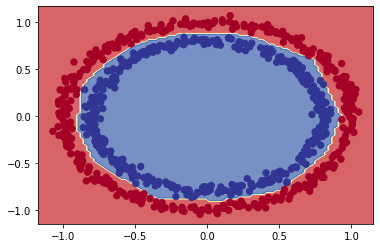

In [19]:
from helper_function import plot_decision_boundary
plot_decision_boundary(model2, X_train, y_train)

# **Multiclassfication**

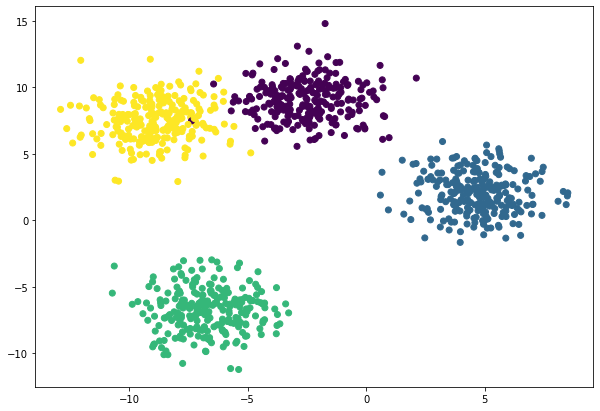

In [20]:
from scipy.sparse.construct import random
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

num_classes = 4
num_featrues = 2
random_seed = 42

X_brobs, y_brobs = make_blobs(n_samples=1000,
                              n_features=num_featrues,
                              centers=num_classes,
                              cluster_std=1.5,
                              random_state=random_seed)
X_brobs = torch.from_numpy(X_brobs).type(torch.float)
y_brobs = torch.from_numpy(y_brobs).type(torch.float)
X_train, X_test, y_train, y_test = train_test_split(X_brobs,
                                                    y_brobs,
                                                    test_size=0.2,
                                                    random_state=random_seed)
plt.figure(figsize=(10,7))
plt.scatter(X_brobs[:,0], X_brobs[:,1], c=y_brobs)

In [21]:
class multi_classification(nn.Module):
  def __init__(self):
    super().__init__()
    self.network = nn.Sequential(
        nn.Linear(in_features=2, out_features=8),
        nn.ReLU(),
        nn.Linear(in_features=8, out_features=8),
        nn.ReLU(),
        nn.Linear(in_features=8, out_features=4),
    )
  def forward(self, x):
    return self.network(x)

model3 = multi_classification()

In [22]:
print(X_train[1,:], model3(X_train[1,:]))
print(torch.argmax(model3(X_train[1,:])))

tensor([-2.6249,  9.5260]) tensor([-0.3567,  0.1595, -0.2380,  0.2860], grad_fn=<AddBackward0>)
tensor(3)


In [23]:
sample_pred = torch.argmax(model3(X_train),dim=1)
sample_ans = y_train
torch.sum(sample_pred == sample_ans)

tensor(228)

In [24]:
def acc_fn(y_pred, y_true):
  y_class = torch.argmax(torch.tensor(nn.functional.softmax(y_pred)), dim=1)
  correct = torch.sum(y_class == y_true)
  acc = correct/len(y_class)*100
  return acc

In [25]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model3.parameters(), lr=0.1)
epochs = 100
y_train_oh = nn.functional.one_hot(y_train.long())
y_test_oh = nn.functional.one_hot(y_test.long())

for epoch in range(epochs):
  model3.train()
  y_predict = model3(X_train)
  loss = loss_fn(y_predict, y_train.long())
  acc = acc_fn(y_predict, y_train)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  model3.eval()
  with torch.inference_mode():
    test_predict = model3(X_test)
    test_loss = loss_fn(test_predict, y_test.long())
    test_acc = acc_fn(test_predict, y_test)

  if epoch % 10 == 0:
    print(f"Epoch: {epoch} | Loss: {loss:.5f}, Accuracy: {acc:.2f}% | TestLoss: {test_loss:.5f}, Test Acc: {test_acc:.2f}%")

<ipython-input-24-76ed1ac3e0d8>:2: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  y_class = torch.argmax(torch.tensor(nn.functional.softmax(y_pred)), dim=1)
<ipython-input-24-76ed1ac3e0d8>:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_class = torch.argmax(torch.tensor(nn.functional.softmax(y_pred)), dim=1)


Epoch: 0 | Loss: 1.33721, Accuracy: 28.50% | TestLoss: 1.20584, Test Acc: 35.50%
Epoch: 10 | Loss: 0.63054, Accuracy: 94.50% | TestLoss: 0.59672, Test Acc: 94.50%
Epoch: 20 | Loss: 0.34211, Accuracy: 99.00% | TestLoss: 0.32705, Test Acc: 99.50%
Epoch: 30 | Loss: 0.13621, Accuracy: 99.25% | TestLoss: 0.11971, Test Acc: 99.50%
Epoch: 40 | Loss: 0.07223, Accuracy: 99.25% | TestLoss: 0.06255, Test Acc: 99.50%
Epoch: 50 | Loss: 0.05428, Accuracy: 99.12% | TestLoss: 0.04563, Test Acc: 99.50%
Epoch: 60 | Loss: 0.04586, Accuracy: 99.12% | TestLoss: 0.03743, Test Acc: 99.50%
Epoch: 70 | Loss: 0.04094, Accuracy: 99.12% | TestLoss: 0.03253, Test Acc: 99.50%
Epoch: 80 | Loss: 0.03772, Accuracy: 99.12% | TestLoss: 0.02925, Test Acc: 99.50%
Epoch: 90 | Loss: 0.03545, Accuracy: 99.12% | TestLoss: 0.02688, Test Acc: 99.50%


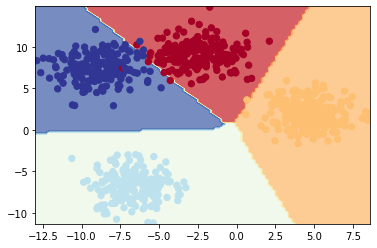

In [26]:
plot_decision_boundary(model3, X_train, y_train)

# **Computer vision**

In [27]:
from torchvision import datasets
import torchvision

data = datasets.Caltech101(
    root="data",
    download=True,
    transform=torchvision.transforms.ToTensor(),
    target_transform=None
)

0it [00:00, ?it/s]

Extracting data/caltech101/101_ObjectCategories.tar.gz to data/caltech101


0it [00:00, ?it/s]

Extracting data/caltech101/Annotations.tar to data/caltech101


In [28]:
import torchvision
from torchvision import datasets
from torchvision.transforms import ToTensor

train_data = datasets.FashionMNIST(
    root="data", 
    train=True, 
    download=True, 
    transform=ToTensor(), 
    target_transform=None 
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

  0%|          | 0/26421880 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



  0%|          | 0/29515 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



  0%|          | 0/4422102 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



  0%|          | 0/5148 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



In [29]:
from torch.utils.data import DataLoader


train_loader=DataLoader(dataset=train_data,
                  batch_size=32,
                  shuffle=True)
test_loader=DataLoader(dataset=test_data,
                  batch_size=32,
                  shuffle=False)

In [30]:
class Fashin_classification(nn.Module):
  def __init__(self):
    super().__init__()
    self.network=nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=784, out_features=128),
        nn.ReLU(),
        nn.Linear(in_features=128, out_features=128),
        nn.ReLU(),
        nn.Linear(in_features=128, out_features=10)
    )

  def forward(self, X):
    return self.network(X)
model4 = Fashin_classification()

In [31]:
from helper_function import accuracy_fn

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model4.parameters(),
                             lr=0.1)

In [32]:
from tqdm.auto import tqdm
epochs=3

for epoch in tqdm(range(epochs)):
  print("Epoch:",epoch)
  train_loss = 0

  for batch, (X, y) in enumerate(train_loader):
    model4.train()
    y_pred = model4(X)
    loss = loss_fn(y_pred, y)
    train_loss += loss
    optimizer.zero_grad()

    loss.backward()
    optimizer.step()
    if batch % 400 == 0:
      print(f"Looked at {batch}/{len(train_loader)} samples")
  train_loss /= len(train_loader)
  test_loss, test_acc = 0, 0
  model4.eval()
  with torch.inference_mode():
    for X_test, y_test in test_loader:
      test_pred = model4(X_test)
      test_loss += loss_fn(test_pred, y_test)
      test_acc += accuracy_fn(y_true=y_test, y_pred=test_pred.argmax(dim=1))

    test_loss /= len(test_loader)
    test_acc /= len(test_loader)
  print(f"\nTrain loss: {train_loss:.5f} | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%\n")

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
Looked at 0/1875 samples
Looked at 400/1875 samples
Looked at 800/1875 samples
Looked at 1200/1875 samples
Looked at 1600/1875 samples

Train loss: 0.59459 | Test loss: 0.45180, Test acc: 83.75%

Epoch: 1
Looked at 0/1875 samples
Looked at 400/1875 samples
Looked at 800/1875 samples
Looked at 1200/1875 samples
Looked at 1600/1875 samples

Train loss: 0.40483 | Test loss: 0.43384, Test acc: 84.22%

Epoch: 2
Looked at 0/1875 samples
Looked at 400/1875 samples
Looked at 800/1875 samples
Looked at 1200/1875 samples
Looked at 1600/1875 samples

Train loss: 0.36295 | Test loss: 0.39238, Test acc: 85.98%



In [33]:
from torch.nn.modules.pooling import MaxPool2d
class Conv_FMNIST(nn.Module):
  def __init__(self):
    super().__init__()
    self.block1 = nn.Sequential(
        nn.Conv2d(in_channels=1, out_channels=10, kernel_size=3, stride=1, padding=1),
        nn.ReLU(),
        nn.Conv2d(in_channels=10, out_channels=10, kernel_size=3, stride=1, padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2, stride=2),
    )
    self.block2 = nn.Sequential(
        nn.Conv2d(in_channels=10, out_channels=10, kernel_size=3, stride=1, padding=1),
        nn.ReLU(),
        nn.Conv2d(in_channels=10, out_channels=10, kernel_size=3, stride=1, padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2, stride=2),
    )

    self.classifier = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=10*7*7,
                  out_features=10)
    )
    self.dropout = nn.Dropout(0.3)
    
  def forward(self, X):
    X = self.block1(X)
    X = self.block2(X)
    X = self.classifier(X)
    return X

model5 = Conv_FMNIST()
model5

Conv_FMNIST(
  (block1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (block2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
  (dropout): Dropout(p=0.3, inplace=False)
)

In [34]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model5.parameters(),
                             lr=0.1)

In [35]:
from tqdm.auto import tqdm
epochs=3

for epoch in tqdm(range(epochs)):
  print("Epoch:",epoch)
  train_loss = 0
  l1_penalty = 0

  for batch, (X, y) in enumerate(train_loader):
    l1_penalty += torch.norm(output, 1)
    l1_penalty *= l1_lambda
    model5.train()
    y_pred = model5(X)
    loss = loss_fn(y_pred, y)+l1_penalty
    train_loss += loss
    optimizer.zero_grad()

    loss.backward()
    optimizer.step()
    if batch % 400 == 0:
      print(f"Looked at {batch}/{len(train_loader)} samples")
  train_loss /= len(train_loader)
  test_loss, test_acc = 0, 0
  model5.eval()
  with torch.inference_mode():
    for X_test, y_test in test_loader:
      test_pred = model5(X_test)
      test_loss += loss_fn(test_pred, y_test)
      test_acc += accuracy_fn(y_true=y_test, y_pred=test_pred.argmax(dim=1))

    test_loss /= len(test_loader)
    test_acc /= len(test_loader)
  print(f"\nTrain loss: {train_loss:.5f} | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%\n")

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
Looked at 0/1875 samples
Looked at 400/1875 samples
Looked at 800/1875 samples
Looked at 1200/1875 samples
Looked at 1600/1875 samples

Train loss: 0.52642 | Test loss: 0.38850, Test acc: 86.10%

Epoch: 1
Looked at 0/1875 samples
Looked at 400/1875 samples
Looked at 800/1875 samples
Looked at 1200/1875 samples
Looked at 1600/1875 samples

Train loss: 0.33827 | Test loss: 0.35445, Test acc: 86.83%

Epoch: 2
Looked at 0/1875 samples
Looked at 400/1875 samples
Looked at 800/1875 samples
Looked at 1200/1875 samples
Looked at 1600/1875 samples

Train loss: 0.30723 | Test loss: 0.30402, Test acc: 89.21%

